# A Statistical Analysis of the Boston House Prices Dataset

The purpose of this notebook is to introduce the reader to the well known data set of Boston House Prices.
The dataset was originally published by **Harrison, D. and Rubinfeld, D.L.** *`Hedonic prices and the demand for clean air'*, J. Environ. Economics & Management, vol.5, 81-102, 1978.

It contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms.

**Reference:** https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

There are a number of versions of this dataset available, however for the purposes of this assignment, I will use the dataset that is included in the scikit-learn package for Python.

**Python packages used in the analysis** <br>
Below, I import the packages necessary to carry out all of the work that is coded within this notebook

In [35]:
# To import the boston dataset. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston
import sklearn as sk

# for dataframe creation and manipulation
import pandas as pd

# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
# for mathematical tools and plotting
import numpy as np
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt

## Document Objectives

The document is split into a number of distinct sections, aimed at providing a comprehensive statistical analysis of the data contained in the Boston House Price datset.

***
### 1. Descriptive Statistics
First, we will take a look at the data using some descriptive statistics, as well as attempting to identify what, if any relationships exist between the included variables.

***
### 2. Inferential Statistics
We will then take a specific look at the price of houses divided into two distinct groups; those situated along the Charles River, and those that are not. We will attempt to infer from the data, whether there is a statistically significant difference between the values of houses in the two categories.

***
### 3. Prediction

We will use the keras package to create a neural network that can predict the median house price, based on the other variables in the dataset.
***

## Part 1: Describing the Dataset

In [36]:
# load the dataset
boston = load_boston()

# https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
# identify the various contents of the dataset
# data: this is the actual recorded data
# target: this is the median house price per area. It is usually the variable we are attempting to predict, 
# and so is not included in the data
# feature_names: the names of the attributes contained in the data
# DESCR: is a text description of the data, including definition of the attributes, no. of instances and various other information
# filename: the full path file name of the dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [37]:
boston.filename

'/opt/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/boston_house_prices.csv'

In [38]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [39]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

***
'MEDV', the **target** variable, is stored separately to the rest of the data. So we will store the data as a Pandas dataframe, and add the target variable to df.
***

In [40]:
# create a dataframe, with column headers equal to the attribute names
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names

In [41]:
# add the target variable to the dataframe as 'MEDV'
df["MEDV"] = boston.target

In [42]:
# df.shape will show that the dataset contains 13 columns (or attributes), with 506 rows.
# One of which is the header row, therefore 505 records in the dataset 
df.shape

(506, 14)

In [43]:
# Display the first 5 rows in the dataset, to get an idea of what is contained
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
# There are no missing values in the dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

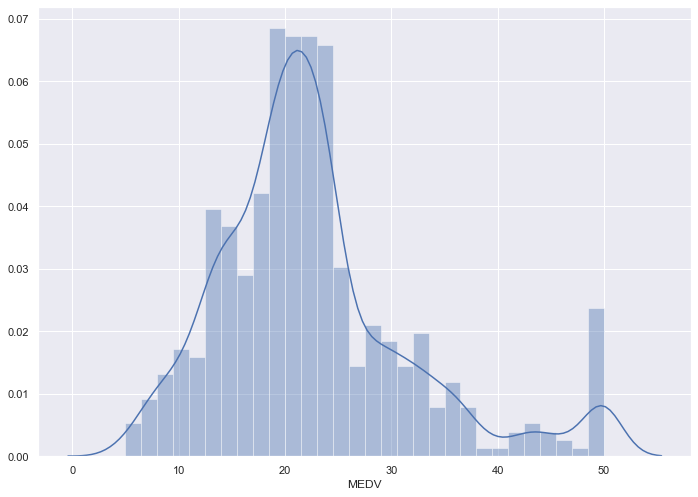

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

The above shows that the Median House Price values per area are normally distributed.
Noteably, there are an unusual number of duplicate values set at 50.0, which suggests outliers.
There may also be outliers pertaining to other attributes, that will potentially skew the data and impact on later investigation, so I will test now for outliers and remove them before proceeding.

In [47]:
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
z = np.abs(sts.zscore(df))
df_1 = df[(z < 3).all(axis=1)]

Now we will look at some basic descriptive statistics for the remaining instances

In [51]:
pd.set_option('display.max_rows', None)
stats = df_1.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
CRIM,415.0,2.452461,4.897241,0.00632,0.081005,0.21161,2.152115,28.6558
ZN,415.0,9.602410,19.677404,0.00000,0.000000,0.00000,12.500000,80.0000
INDUS,415.0,10.829687,6.798613,0.46000,5.130000,8.56000,18.100000,27.7400
CHAS,415.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000
NOX,415.0,0.547168,0.110428,0.38500,0.449000,0.52400,0.609000,0.8710
RM,415.0,6.267554,0.611602,4.36800,5.886000,6.19300,6.559500,8.3370
AGE,415.0,67.384337,28.072043,2.90000,43.550000,73.90000,93.700000,100.0000
DIS,415.0,3.852640,1.964763,1.16910,2.203200,3.37790,5.287300,9.2229
RAD,415.0,8.684337,8.196802,1.00000,4.000000,5.00000,8.000000,24.0000
TAX,415.0,393.853012,161.196133,188.00000,279.000000,315.00000,437.000000,711.0000


In [52]:
pd.set_option('display.max_rows', 10)

We can review the descriptions of the attributes to see if there are any interesting relationships to be identified.<br>
For example, one might expect that there would be some positive correlation between CRIM and LSTAT attributes, where the crime rate rises as the percentage of lower status residents increases.

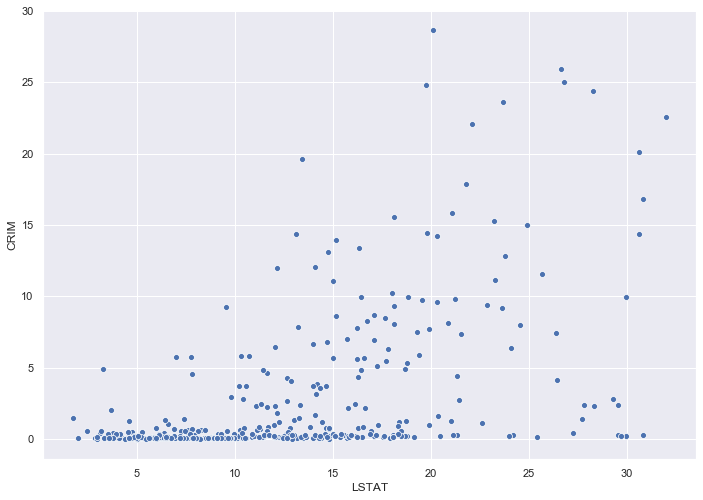

In [55]:
sns.scatterplot(x = df_1['LSTAT'] , y = df_1['CRIM'])

and we can see the above scatterplot shows a moderate positive trend.
<br><br>
Similarly, we might assume that a lower pupil-teacher ratio might suggest a more affluent neighbourhood and therefore a lower crime rate, so we might also expect to see a positive correlation between PTRATIO and CRIM. However this is not as obvious.

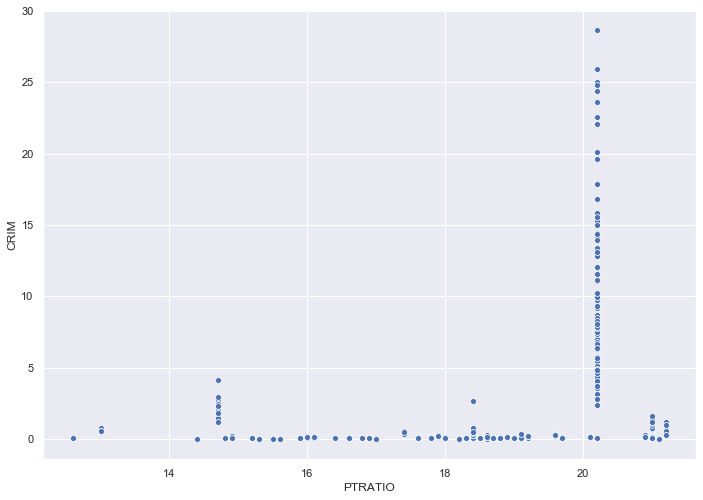

In [57]:
sns.scatterplot(x = df_1['PTRATIO'] , y = df_1['CRIM'])

Since MEDV, or the Median House Price Value per town will be the target attribute for our prediction later, there are a number of attributes that we could assume might have a great impact on MEDV:
<br>
- CRIM
- ZN
- RM
- RAD
- DIS
- PTRATIO
- LSTAT

The below heatmap indicates the strength of correlation between each pair of attributes

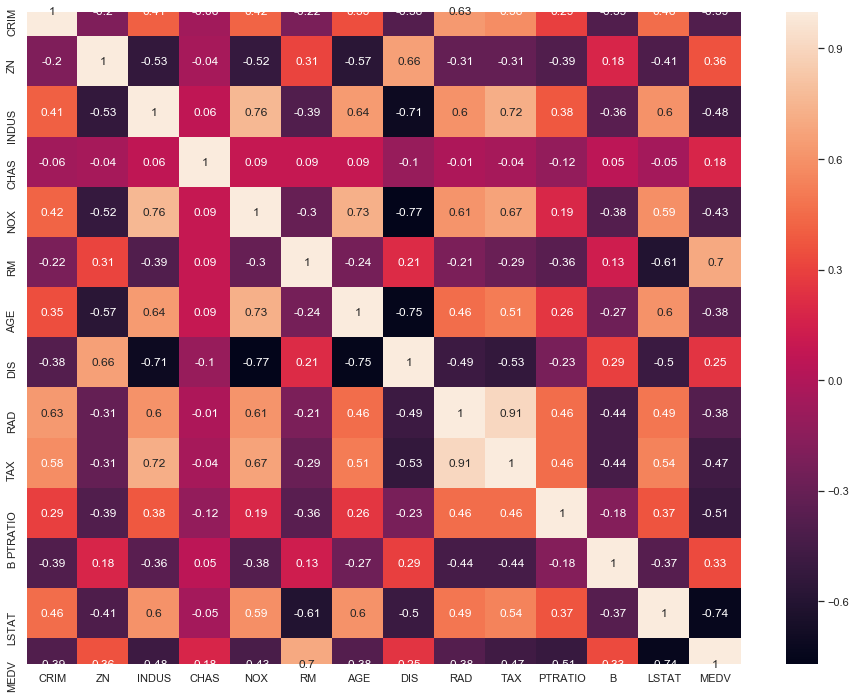

In [61]:
# https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(16, 12))
sns.heatmap(data=correlation_matrix, annot=True)

We can also print the correlation matrix to show us the correlation coefficients.
<br>
Here, we can see that the correlation we discussed earlier (CRIM/LSTAT and CRIM/PTRATIO) are 0.46 and 0.29, or moderate positive and weak positive, respectively. This did reflect our scatterplots and the assumptions we made based on them.

In [28]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


If we review the R values for the MEDV column, we can see the strongest correlations are in fact:<br>
- LSTAT: -0.74
- PTRATIO: -0.51
- RM: 0.70

There are a number of other attributes with lower moderate correlations, but these three seem to stand out as the predominant factors in calculating the Median Property Values.

## Part 2: Inference WRT MEDV based on CHAS

## Part 3: Machine Learning - Model to Predict MEDV

After some research, the following points of note have appeared consistently across a number of investigations on the boston dataset.

- a number of sources have identified the following variables as key to the calculation of MEDV
    - RM
    - LSTAT
    - PTRATIO

- good pactice to remove significant outlier data, to help in creating a more accurate model





**References**
https://www.ritchieng.com/machine-learning-project-boston-home-prices/


In [ ]:
|